In [1]:
import pandas as pd

customer_data = pd.read_csv("customer_master.csv")
customer_data.head()

,customer_id,customer_name,registration_date,customer_name_kana,email,gender,age,birth,pref
0,IK152942,平田 裕次郎,2019-01-01 00:25:33,ひらた ゆうじろう,hirata_yuujirou@example.com,M,29,1990/6/10,石川県
1,TS808488,田村 詩織,2019-01-01 01:13:45,たむら しおり,tamura_shiori@example.com,F,33,1986/5/20,東京都
2,AS834628,久野 由樹,2019-01-01 02:00:14,ひさの ゆき,hisano_yuki@example.com,F,63,1956/1/2,茨城県
3,AS345469,鶴岡 薫,2019-01-01 04:48:22,つるおか かおる,tsuruoka_kaoru@example.com,M,74,1945/3/25,東京都
4,GD892565,大内 高史,2019-01-01 04:54:51,おおうち たかし,oouchi_takashi@example.com,M,54,1965/8/5,千葉県


In [2]:
item_data = pd.read_csv("item_master.csv")
item_data.head()

,item_id,item_name,item_price
0,S001,PC-A,50000
1,S002,PC-B,85000
2,S003,PC-C,120000
3,S004,PC-D,180000
4,S005,PC-E,210000


In [3]:
transaction_data_1 = pd.read_csv("transaction_1.csv")
transaction_data_1.head()

,transaction_id,price,payment_date,customer_id
0,T0000000113,210000,2019-02-01 01:36:57,PL563502
1,T0000000114,50000,2019-02-01 01:37:23,HD678019
2,T0000000115,120000,2019-02-01 02:34:19,HD298120
3,T0000000116,210000,2019-02-01 02:47:23,IK452215
4,T0000000117,170000,2019-02-01 04:33:46,PL542865


In [4]:
transaction_data_2 = pd.read_csv("transaction_2.csv")
transaction_data_2.head()

,transaction_id,price,payment_date,customer_id
0,T0000005113,295000,2019-06-15 07:20:27,TS169261
1,T0000005114,50000,2019-06-15 07:35:47,HI599892
2,T0000005115,85000,2019-06-15 07:56:36,HI421757
3,T0000005116,50000,2019-06-15 08:40:55,OA386378
4,T0000005117,120000,2019-06-15 08:44:23,TS506913


In [5]:
detail_data_1 = pd.read_csv("transaction_detail_1.csv")
detail_data_2 = pd.read_csv("transaction_detail_2.csv")

In [6]:
transaction_data = pd.concat([transaction_data_1, transaction_data_2])
transaction_data.head()

,transaction_id,price,payment_date,customer_id
0,T0000000113,210000,2019-02-01 01:36:57,PL563502
1,T0000000114,50000,2019-02-01 01:37:23,HD678019
2,T0000000115,120000,2019-02-01 02:34:19,HD298120
3,T0000000116,210000,2019-02-01 02:47:23,IK452215
4,T0000000117,170000,2019-02-01 04:33:46,PL542865


In [7]:
transaction_data.dtypes

transaction_id    object
price              int64
payment_date      object
customer_id       object
dtype: object

In [10]:
transaction_data.isnull().sum()

transaction_id    0
price             0
payment_date      0
customer_id       0
dtype: int64

- データが正しく結合されているかどうかの確認

In [8]:
(len(transaction_data)) == (len(transaction_data_1) + len(transaction_data_2))

True

- detailデータの結合(縦)

In [10]:
detail_data = pd.concat([detail_data_1, detail_data_2])
detail_data.head()

,detail_id,transaction_id,item_id,quantity
0,0,T0000000113,S005,1
1,1,T0000000114,S001,1
2,2,T0000000115,S003,1
3,3,T0000000116,S005,1
4,4,T0000000117,S002,2


- 結合がうまくいっているかの確認

In [11]:
len(detail_data) == (len(detail_data_1) + len(detail_data_2))

True

In [12]:
detail_data.isnull().sum()

detail_id         0
transaction_id    0
item_id           0
quantity          0
dtype: int64

In [13]:
detail_data.dtypes

detail_id          int64
transaction_id    object
item_id           object
quantity           int64
dtype: object

## 売上データ同士を結合(横に)してみる
- detail_dataにtransaction_dataを結合するよ

In [14]:
df = pd.merge(detail_data, transaction_data[["transaction_id", "payment_date", "customer_id"]], on = "transaction_id", how = "left")
df.head()

,detail_id,transaction_id,item_id,quantity,payment_date,customer_id
0,0,T0000000113,S005,1,2019-02-01 01:36:57,PL563502
1,1,T0000000114,S001,1,2019-02-01 01:37:23,HD678019
2,2,T0000000115,S003,1,2019-02-01 02:34:19,HD298120
3,3,T0000000116,S005,1,2019-02-01 02:47:23,IK452215
4,4,T0000000117,S002,2,2019-02-01 04:33:46,PL542865


- 次に，顧客や商品情報を付加するために，customer_master, item_masterをjoinしてみる．

In [15]:
main_data = pd.merge(df, customer_data, on = "customer_id", how = "left")
main_data = pd.merge(main_data, item_data, on = "item_id", how = "left")
main_data.head()

,detail_id,transaction_id,item_id,quantity,payment_date,customer_id,customer_name,registration_date,customer_name_kana,email,gender,age,birth,pref,item_name,item_price
0,0,T0000000113,S005,1,2019-02-01 01:36:57,PL563502,井本 芳正,2019-01-07 14:34:35,いもと よしまさ,imoto_yoshimasa@example.com,M,30,1989/7/15,熊本県,PC-E,210000
1,1,T0000000114,S001,1,2019-02-01 01:37:23,HD678019,三船 六郎,2019-01-27 18:00:11,みふね ろくろう,mifune_rokurou@example.com,M,73,1945/11/29,京都府,PC-A,50000
2,2,T0000000115,S003,1,2019-02-01 02:34:19,HD298120,山根 小雁,2019-01-11 08:16:02,やまね こがん,yamane_kogan@example.com,M,42,1977/5/17,茨城県,PC-C,120000
3,3,T0000000116,S005,1,2019-02-01 02:47:23,IK452215,池田 菜摘,2019-01-10 05:07:38,いけだ なつみ,ikeda_natsumi@example.com,F,47,1972/3/17,兵庫県,PC-E,210000
4,4,T0000000117,S002,2,2019-02-01 04:33:46,PL542865,栗田 憲一,2019-01-25 06:46:05,くりた けんいち,kurita_kenichi@example.com,M,74,1944/12/17,長崎県,PC-B,85000


In [16]:
main_data.isnull().sum()

detail_id             0
transaction_id        0
item_id               0
quantity              0
payment_date          0
customer_id           0
customer_name         0
registration_date     0
customer_name_kana    0
email                 0
gender                0
age                   0
birth                 0
pref                  0
item_name             0
item_price            0
dtype: int64

In [17]:
main_data.dtypes

detail_id              int64
transaction_id        object
item_id               object
quantity               int64
payment_date          object
customer_id           object
customer_name         object
registration_date     object
customer_name_kana    object
email                 object
gender                object
age                    int64
birth                 object
pref                  object
item_name             object
item_price             int64
dtype: object

In [18]:
main_data["price"] = main_data["quantity"] * main_data["item_price"]
main_data[["quantity", "item_price", "price"]].head()

,quantity,item_price,price
0,1,210000,210000
1,1,50000,50000
2,1,120000,120000
3,1,210000,210000
4,2,85000,170000


- 月別にデータを集計してみる.

In [19]:
main_data.dtypes

detail_id              int64
transaction_id        object
item_id               object
quantity               int64
payment_date          object
customer_id           object
customer_name         object
registration_date     object
customer_name_kana    object
email                 object
gender                object
age                    int64
birth                 object
pref                  object
item_name             object
item_price             int64
price                  int64
dtype: object

In [20]:
main_data["payment_date"] = pd.to_datetime(main_data["payment_date"])
main_data["payment_month"] = main_data["payment_date"].dt.strftime("%Y-%m")
main_data[["payment_date", "payment_month"]].head()

,payment_date,payment_month
0,2019-02-01 01:36:57,2019-02
1,2019-02-01 01:37:23,2019-02
2,2019-02-01 02:34:19,2019-02
3,2019-02-01 02:47:23,2019-02
4,2019-02-01 04:33:46,2019-02


In [44]:
main_data.dtypes

detail_id                      int64
transaction_id                object
item_id                       object
quantity                       int64
payment_date          datetime64[ns]
customer_id                   object
customer_name                 object
registration_date             object
customer_name_kana            object
email                         object
gender                        object
age                            int64
birth                         object
pref                          object
item_name                     object
item_price                     int64
price                          int64
payment_month                 object
dtype: object

In [21]:
main_data.groupby("payment_month").sum()["price"]

payment_month
2019-02    160185000
2019-03    160370000
2019-04    160510000
2019-05    155420000
2019-06    164030000
2019-07    170620000
Name: price, dtype: int64

- 商品ごとに，個別でデータを集計してみる．

In [22]:
main_data.groupby(["payment_month", "item_price"]).sum()[["price", "quantity"]]

price  quantity
payment_month item_price                    
2019-02       50000       24150000       483
              85000       25245000       297
              120000      19800000       165
              180000      31140000       173
              210000      59850000       285
2019-03       50000       26000000       520
              85000       25500000       300
              120000      19080000       159
              180000      25740000       143
              210000      64050000       305
2019-04       50000       25900000       518
              85000       23460000       276
              120000      21960000       183
              180000      24300000       135
              210000      64890000       309
2019-05       50000       24850000       497
              85000       25330000       298
              120000      20520000       171
              180000      25920000       144
              210000      58800000       280
2019-06       50000       26000000       520
              85000       23970000       282
              120000      21840000       182
              180000      28800000       160
              210000      63420000       302
2019-07       50000       25250000       505
              85000       28220000       332
              120000      19440000       162
              180000      26100000       145
              210000      71610000       341

- だいぶ見にくいので、以下のように`pd.pivot_table()`を用いる．

In [24]:
df_1 = pd.pivot_table(main_data, index = "item_name", columns = "payment_month", values = ["price", "quantity"], aggfunc = "sum") 

In [25]:
df_1

price                                                    \
payment_month   2019-02   2019-03   2019-04   2019-05   2019-06   2019-07   
item_name                                                                   
PC-A           24150000  26000000  25900000  24850000  26000000  25250000   
PC-B           25245000  25500000  23460000  25330000  23970000  28220000   
PC-C           19800000  19080000  21960000  20520000  21840000  19440000   
PC-D           31140000  25740000  24300000  25920000  28800000  26100000   
PC-E           59850000  64050000  64890000  58800000  63420000  71610000   

              quantity                                          
payment_month  2019-02 2019-03 2019-04 2019-05 2019-06 2019-07  
item_name                                                       
PC-A               483     520     518     497     520     505  
PC-B               297     300     276     298     282     332  
PC-C               165     159     183     171     182     162  
PC-D               173     143     135     144     160     145  
PC-E               285     305     309     280     302     341

In [36]:
graph_data = pd.pivot_table(main_data, index = "payment_month", columns = "item_name", values = "price", aggfunc = "sum")
graph_data

item_name,PC-A,PC-B,PC-C,PC-D,PC-E
payment_month,,,,,
2019-02,24150000,25245000,19800000,31140000,59850000
2019-03,26000000,25500000,19080000,25740000,64050000
2019-04,25900000,23460000,21960000,24300000,64890000
2019-05,24850000,25330000,20520000,25920000,58800000
2019-06,26000000,23970000,21840000,28800000,63420000
2019-07,25250000,28220000,19440000,26100000,71610000


In [40]:
[ i for i in graph_data.index]

['2019-02', '2019-03', '2019-04', '2019-05', '2019-06', '2019-07']

In [41]:
[i for i in df_1.index]

['PC-A', 'PC-B', 'PC-C', 'PC-D', 'PC-E']

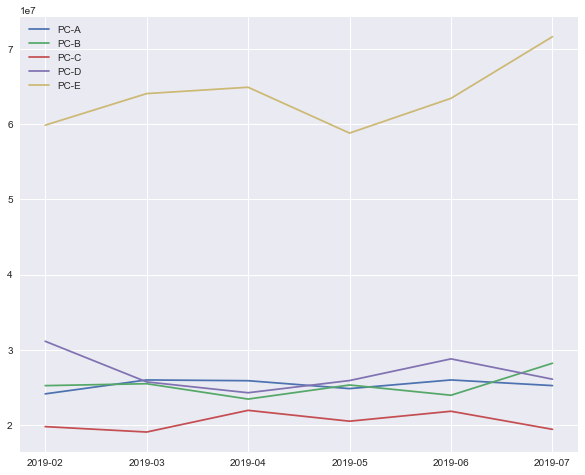

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn")
%matplotlib inline

count = 1
plt.figure(figsize = (10, 8))
for item in df_1.index:
    if count == 5:
        plt.plot(list(graph_data.index), graph_data[item], label = item)
        plt.legend()
        plt.show()
        
    else:
        plt.plot(list(graph_data.index), graph_data[item], label = item)
        count += 1

- PC-Eが圧倒的に売上高を支えていることがわかる．